In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tqdm import tqdm # Полезная библиотека для создания прогресс-баров

In [6]:
G = 6.67

def Norm(vec):
    """
    

    Parameters
    ----------
    vec : входной вектор.

    Returns
    -------
    Норму вектора.

    """
    return (np.sum(np.array(vec) ** 2))**(1/2)


class CosmicBody():

    """
    Class desribes any CosmicBody. 
    Placed in (0,1000), has 10 kg mass and zero velosity, if doesn't mentioned another
    Mass [kg]
    P[m, m]
    V[m/s]
    """
    
    def __init__(self, mass: float = 10, vec_p=(0, 1000), vec_v=(0, 0, 0)):
        self.exist = 1
        self.mass = mass
        self.vec_p = np.array(vec_p)
        self.vec_v = np.array(vec_v)

    def destroy(self):
        self.exist = 0
        self.mass = 0
        self.vec_v = (0, 0, 0)

    def distance(self, body):
        return (body.vec_p - self.vec_p)

    def move(self, dt):
        """
        
        
        Parameters
        ----------
        dt : промежуток времени

        Returns
        -------
        Меняет координату как если бы тело двигалось равномерно прямолинейно в течении dt

        """

        self.vec_p = self.vec_p + self.vec_v * dt * self.exist

    def grav(self, dt, *bodies):
        """
        

        Parameters
        ----------
        dt : промежуток времени.
        *bodies : кортеж взаимодействующих тел.
        M : масса конкретного тела.

        Returns
        -------
        Изменяет скорость self по второму закону ньютона для self и *bodies

        """

        for i in range(len(bodies)):
            M = bodies[i].getMass()
            r = self.distance(bodies[i])
            self.vec_v = self.vec_v + G * M * r * dt / \
                (Norm(r) ** 3) * self.exist * bodies[i].exist

    def getMass(self):
        return self.mass

    def getPosition(self):
        return self.vec_p

    def getVelosity(self):
        return self.vec_v



<IPython.core.display.Javascript object>


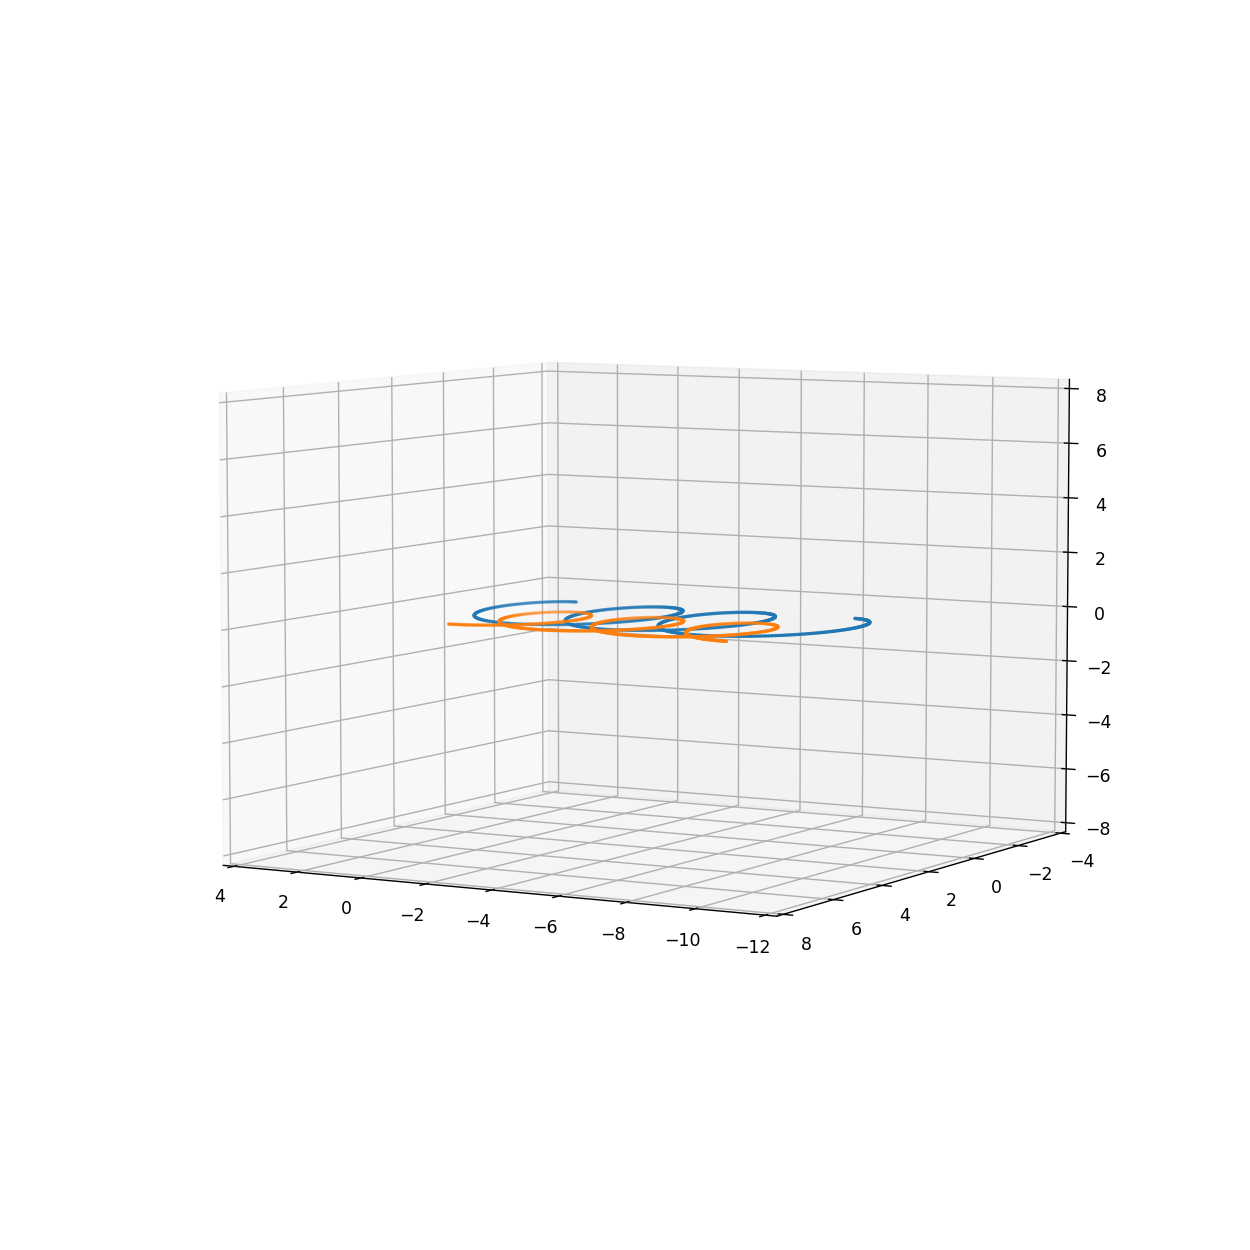

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:11<00:00,  7.61it/s]


In [8]:
# Магическая строка для корректного отображения анимации
%matplotlib notebook
# Создаем фигуру 
fig = plt.figure(figsize=(10, 10))
# Добавляем на нее объект Axes3D для отображения графиков в 3D
ax = fig.add_subplot(111, projection='3d')
# Задаем границы
ax.axes.set_xlim3d(-10, 2)
ax.axes.set_ylim3d(-0.2, 5.2)
ax.axes.set_zlim3d(-8, 8)    

# Отображаем пустую фигуру
fig.show()
fig.canvas.draw()

velosity = [(2, 0, 0), (-3, 0, 0)]
Ast1 = CosmicBody(12, (0, 0, 0), velosity[0])
Ast2 = CosmicBody(16, (0, 5, 0), velosity[1])
x1 = [Ast1.getPosition()[0]]
y1 = [Ast1.getPosition()[1]]
x2 = [Ast2.getPosition()[0]]
y2 = [Ast2.getPosition()[1]]
z1 = [0]
z2 = [0]

dt = 0.01
n = 1000
t = 0


for t in tqdm(np.arange(0., dt*n, dt)):
    angle = 60 + 60 * t / dt/n
    # Удаляем графики, отображенные на предыдущем шаге
    ax.clear()
    # Задаем границы, потому что они скидываются на дефолтные
    ax.axes.set_xlim3d(-12, 4)
    ax.axes.set_ylim3d(-4, 8)
    ax.axes.set_zlim3d(-8, 8) 
    Ast1.grav(dt, Ast2)
    Ast2.grav(dt, Ast1)
    Ast1.move(dt)
    Ast2.move(dt)
    x1.append(Ast1.getPosition()[0])
    y1.append(Ast1.getPosition()[1])
    z1.append(0)
    x2.append(Ast2.getPosition()[0])
    y2.append(Ast2.getPosition()[1])
    z2.append(0)
    # Отображаем движение точки по прямой
    ax.scatter(x1, y1, z1, s=1)
    ax.scatter(x2, y2, z2, s=1)
    # Изменяем угол отображения графика
    ax.view_init(30 - angle * 0.2, angle)
    # Перерисовываем фигуру
    fig.canvas.draw()